<a href="https://colab.research.google.com/github/nurilhaidar/Machine-Learning/blob/main/Mukhammad_Nuril_Haidar_Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>TUGAS WEEK 09<h2>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from sklearn.datasets import fetch_openml

# Memuat dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [56]:
# Split Data
X = mnist.data
y = mnist.target.astype(int)

In [57]:
# Train split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
# Scalling fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Membuat modell ann
from keras.api._v2.keras.layers import Dense
import tensorflow as tf
ann = tf.keras.models.Sequential()
# Membuat input layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
# Membuat output layer
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [60]:
# Compiling model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Memasukkan data yang telah di train ke dalam model
ann.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
560/560 [==============================] - 4s 6ms/step - loss: 0.2447 - accuracy: 0.9320
Epoch 2/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0975 - accuracy: 0.9719
Epoch 3/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0704 - accuracy: 0.9803
Epoch 4/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0446 - accuracy: 0.9871
Epoch 5/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0254 - accuracy: 0.9930
Epoch 6/10
560/560 [==============================] - 4s 8ms/step - loss: 0.0184 - accuracy: 0.9951
Epoch 7/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9949
Epoch 8/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0204 - accuracy: 0.9946
Epoch 9/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0129 - accuracy: 0.9964
Epoch 10/10
560/560 [==============================] - 4s 7ms/step - loss: 0.0093 - accuracy: 0.9975

In [64]:
# Perhitungan akurasi model
loss, accuracy  = ann.evaluate(X_test, y_test, verbose=False)
print(f'Akurasi : {accuracy}')

Akurasi : 0.9716428518295288


1/1 [==============================] - 0s 52ms/step


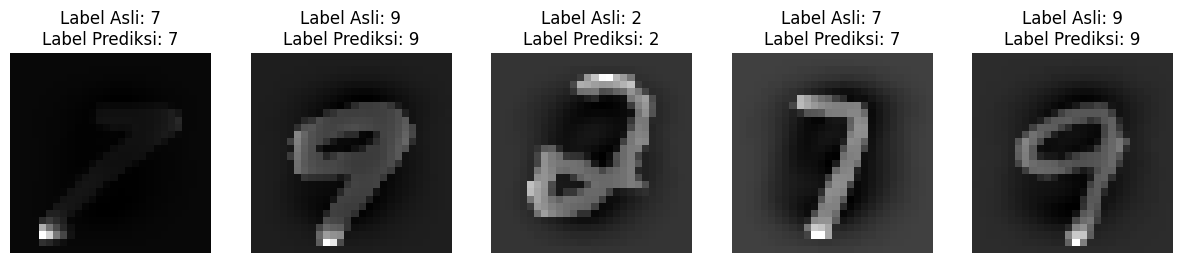

In [65]:
# Penampilan data
num_samples = 5  # Ganti jumlah contoh yang ingin ditampilkan sesuai kebutuhan

fig, axs = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    sample_index = np.random.randint(len(X_test))
    sample_image = X_test[sample_index]
    true_label = y_test[sample_index]

    # Prediksi dengan model yang telah disiapkan (model neural network)
    prediction = ann.predict(np.array([sample_image]))

    # Label prediksi adalah indeks dengan nilai maksimum dari output
    predicted_label = np.argmax(prediction)

    # Menampilkan citra pengujian dan hasil prediksi
    axs[i].imshow(np.reshape(sample_image, (28, 28)), cmap='gray')
    axs[i].set_title(f"Label Asli: {true_label}\nLabel Prediksi: {predicted_label}")
    axs[i].axis('off')

plt.show()